In [162]:
%matplotlib inline 
import collections
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
import copy
from sklearn.metrics.cluster import adjusted_rand_score
import sys
sys.path
sys.path.append(r'C:\Users\t-zemous\Dev\Essex\rainbow-narwhal\Zeinab_modules\msr_graphstats\msr_graphstats')
import lcc 
import cvecGOOD
import ptr
import getElbows
import scipy
import gmm
from sklearn.utils.extmath import randomized_svd
from sklearn import mixture

In [2]:
filename = 'C:/Users/t-zemous/Data/UCI.txt'

In [138]:
G_raw = nx.read_weighted_edgelist(filename, comments='#', delimiter=' ', create_using=nx.DiGraph(), nodetype=str,  encoding='utf-8')
#G_raw = nx.read_weighted_edgelist(filename, comments='#', delimiter=' ', create_using=None, nodetype=str,  encoding='utf-8')
print(G_raw.number_of_nodes())
G = lcc.extract_lcc(G_raw)
print(G.number_of_nodes())

out_degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)  # degree sequence
out_degreeCount = collections.Counter(out_degree_sequence)
out_deg, out_cnt = zip(*out_degreeCount.items())


in_degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)  # degree sequence
in_degreeCount = collections.Counter(in_degree_sequence)
in_deg, in_cnt = zip(*in_degreeCount.items())

tot_degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
tot_degreeCount = collections.Counter(tot_degree_sequence)
tot_deg, tot_cnt = zip(*tot_degreeCount.items())

1899
1294


<Figure size 432x288 with 0 Axes>

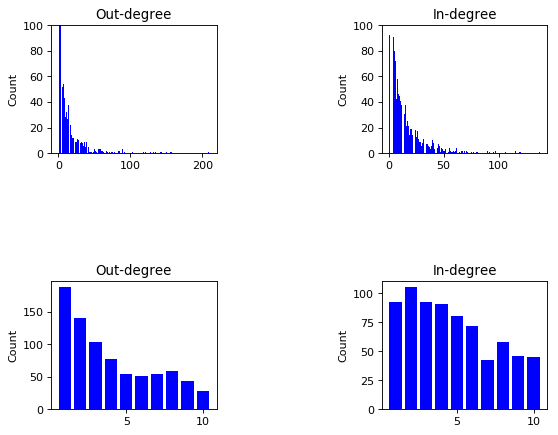

In [95]:
fig = plt.figure()
#fig.tight_layout()
plt.figure(figsize=(8, 6), dpi=80)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 1   # the amount of width reserved for blank space between subplots
hspace = 1   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)



plt.subplot(2, 2, 1)
plt.bar(out_deg, out_cnt, width=0.80, color='b')
plt.title("Out-degree")
plt.ylabel("Count")
#plt.xlabel("Out Degree")
plt.ylim(0, 100)

plt.subplot(2, 2, 2)
plt.bar(in_deg, in_cnt, width=0.80, color='b')
plt.title("In-degree")
plt.ylabel("Count")
#plt.xlabel("In Degree")
plt.ylim(0, 100)

plt.subplot(2, 2, 3)
plt.bar(out_deg[-10:], out_cnt[-10:], width=0.80, color='b')
plt.title("Out-degree")
plt.ylabel("Count")
#plt.xlabel("Out Degree")


plt.subplot(2, 2, 4)
plt.bar(in_deg[-10:], in_cnt[-10:], width=0.80, color='b')
plt.title("In-degree")
plt.ylabel("Count")
#plt.xlabel("In Degree")


# plt.subplot(1, 3, 3)
# plt.bar(tot_deg, tot_cnt, width=0.80, color='b')
# plt.title("Total-degree")
# plt.ylabel("Count")
# plt.xlabel("Total Degree")

# ax.set_xticks([d + 0.4 for d in deg])
# ax.set_xticklabels(deg)
# ax.xaxis.set_tick_params(rotation=90)

# # draw graph in inset
# plt.axes([0.4, 0.4, 0.5, 0.5])
# Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)[0]
# pos = nx.spring_layout(G)
# plt.axis('off')
# nx.draw_networkx_nodes(G, pos, node_size=20)
# nx.draw_networkx_edges(G, pos, alpha=0.4)

plt.show()

In [75]:
edgeweight_sequence = sorted([edge_data['weight'] for (source, target, edge_data) in G.edges(data=True)], reverse=True)
edgeweightCount = collections.Counter(edgeweight_sequence)
edgeweight, edgeweight_cnt = zip(*edgeweightCount.items())


Text(0.5,0,'Edge-weight')

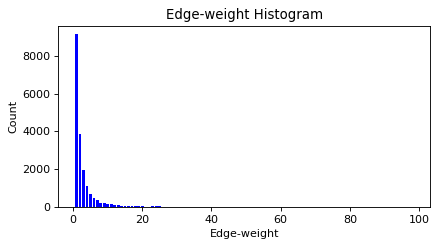

In [72]:
plt.figure(figsize=(6, 3), dpi=80)
plt.bar(edgeweight, edgeweight_cnt, width=0.80, color='b')
plt.title("Edge-weight Histogram")
plt.ylabel("Count")
plt.xlabel("Edge-weight")


In [126]:
if 1:
    weightcolumn = 'weight'
    print("pass_to_ranks")
    G_ptr = ptr.pass_to_ranks(G, weightcol=weightcolumn)
    G_aug_ptr= cvecGOOD.diag_aug(G_ptr) #, weightcol=weightcolumn)
max_dim = 200
svd_seed = 1234
if 1: 
    sorted_vertex = sorted(G_aug_ptr.nodes())
    A = nx.to_scipy_sparse_matrix(G_aug_ptr, nodelist=sorted_vertex)
    
    row, col = A.shape
    n = min(row, col)

#     print ("spectral embedding into %d dimensions" %max_dim)
    
#     U, Sigma, VT = randomized_svd(A, 
#                               n_components=min(max_dim, n - 1),
#                               n_iter=50,
#                               random_state=svd_seed)

#     print ("dimension reduction (elbow selection)")
   
    

pass_to_ranks
spectral embedding into 200 dimensions
dimension reduction (elbow selection)


In [127]:


#A = sparse_random_matrix(100, 100, density=0.01, random_state=42)
#svd = TruncatedSVD(n_components=min(max_dim, n - 1), n_iter=7, random_state=svd_seed)
svd = TruncatedSVD(n_components=200, n_iter=7, random_state=svd_seed)

svd.fit(A)  
ase_var_ratio = svd.explained_variance_ratio_

if 1: 
    deg = (A.sum(axis=1).T).astype(float) 
    deg_array = np.squeeze(np.asarray(deg))
    D = np.diag(deg_array**(-0.5))
    LSE_Matrix = D @ A @ D 
    svd.fit(LSE_Matrix)
    lse_undir_var_ratio = svd.explained_variance_ratio_


# if 1:
#     #print ("spectral embedding into %d dimensions" %max_dim)
#     U, Sigma, VT = randomized_svd(LSE_Matrix, 
#                               n_components=min(max_dim, n - 1),
#                               n_iter=50,
#                               random_state=svd_seed)

if 1:  
    deg = (A.sum(axis=1).T + A.sum(axis=0)).astype(float) 
    deg_array = np.squeeze(np.asarray(deg))
    D = np.diag(deg_array**(-1))
    LSE_Matrix = np.identity(n) - D @ A
    svd.fit(LSE_Matrix)
    lse_dir_var_ratio = svd.explained_variance_ratio_


Text(0.5,0.98,'Screeplots of the Weighted Graph, with ptr')

<Figure size 432x288 with 0 Axes>

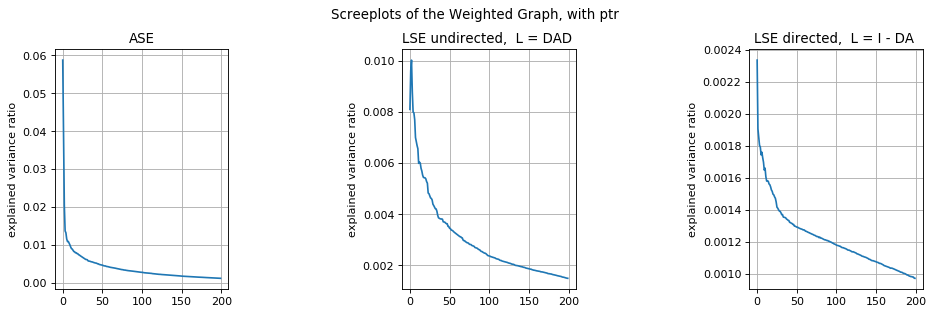

In [129]:
fig = plt.figure()
fig.tight_layout()
plt.figure(figsize=(14, 4), dpi=80)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 1   # the amount of width reserved for blank space between subplots
hspace = 1   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)



plt.subplot(1, 3, 1)
plt.plot(ase_var_ratio)  #, '--o'
#plt.semilogy(svd.explained_variance_ratio_)
plt.ylabel("explained variance ratio") 
plt.title("ASE")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(lse_undir_var_ratio)  #, '--o'
#plt.semilogy(svd.explained_variance_ratio_)
plt.ylabel("explained variance ratio") 
plt.title("LSE undirected,  L = DAD ")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(lse_dir_var_ratio)  #, '--o'
#plt.semilogy(svd.explained_variance_ratio_)
plt.ylabel("explained variance ratio") 
plt.title("LSE directed,  L = I - DA ")
plt.grid()

plt.subplots_adjust(top=0.85)
plt.suptitle('Screeplots of the Weighted Graph, with ptr')

In [130]:
G_binary = copy.deepcopy(G)
if 1:
    for edge in G.edges():
        if G_raw.edges[edge]['weight'] >= 1:
            G_binary[edge[0]][edge[1]]['weight'] = 1


In [131]:

max_dim = 200
svd_seed = 1234
if 1: 
    sorted_vertex = sorted(G_binary.nodes())
    A_bin = nx.to_scipy_sparse_matrix(G_binary, nodelist=sorted_vertex)
    
    row, col = A_bin.shape
    n = min(row, col)

    print ("spectral embedding into %d dimensions" %max_dim)
    
    U, Sigma, VT = randomized_svd(A_bin, 
                              n_components=min(max_dim, n - 1),
                              n_iter=50,
                              random_state=svd_seed)

    print ("dimension reduction (elbow selection)")
   

spectral embedding into 200 dimensions
dimension reduction (elbow selection)


In [132]:

svd = TruncatedSVD(n_components=200, n_iter=7, random_state=svd_seed)

svd.fit(A_bin)  
ase_bin_var_ratio = svd.explained_variance_ratio_

if 1: 
    deg = (A_bin.sum(axis=1).T).astype(float) 
    deg_array = np.squeeze(np.asarray(deg))
    D = np.diag(deg_array**(-0.5))
    LSE_Matrix = D @ A_bin @ D 
    svd.fit(LSE_Matrix)
    lse_bin_undir_var_ratio = svd.explained_variance_ratio_



if 1:  
    deg = (A_bin.sum(axis=1).T + A_bin.sum(axis=0)).astype(float) 
    deg_array = np.squeeze(np.asarray(deg))
    D = np.diag(deg_array**(-1))
    LSE_Matrix = np.identity(n) - D @ A_bin
    svd.fit(LSE_Matrix)
    lse_bin_dir_var_ratio = svd.explained_variance_ratio_


Text(0.5,0.98,'Screeplots of the Binarized Graph')

<Figure size 432x288 with 0 Axes>

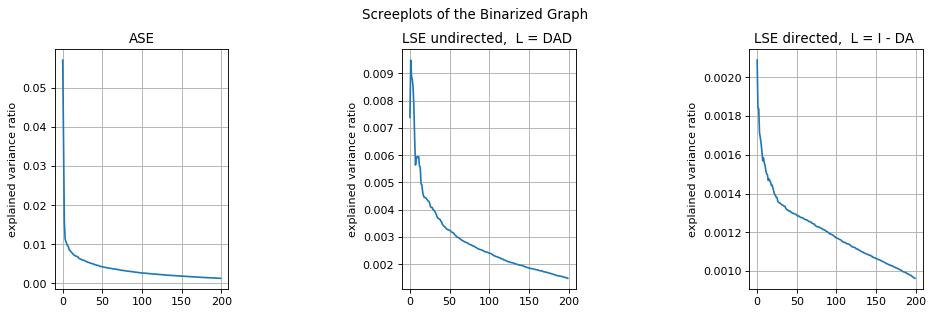

In [133]:
fig = plt.figure()
#fig.tight_layout()
plt.figure(figsize=(14, 4), dpi=80)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 1      # the top of the subplots of the figure
wspace = 1   # the amount of width reserved for blank space between subplots
hspace = 1   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)



plt.subplot(1, 3, 1)
plt.plot(ase_bin_var_ratio)  #, '--o'
#plt.semilogy(svd.explained_variance_ratio_)
plt.ylabel("explained variance ratio") 
plt.title("ASE")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(lse_bin_undir_var_ratio)  #, '--o'
#plt.semilogy(svd.explained_variance_ratio_)
plt.ylabel("explained variance ratio") 
plt.title("LSE undirected,  L = DAD ")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(lse_bin_dir_var_ratio)  #, '--o'
#plt.semilogy(svd.explained_variance_ratio_)
plt.ylabel("explained variance ratio") 
plt.title("LSE directed,  L = I - DA ")
plt.grid()

plt.subplots_adjust(top=0.85)
plt.suptitle('Screeplots of the Binarized Graph')

In [134]:
#NO PTR 

max_dim = 200
svd_seed = 1234
if 1: 
    sorted_vertex = sorted(G.nodes())
    A_noptr = nx.to_scipy_sparse_matrix(G, nodelist=sorted_vertex)
    
    row, col = A_noptr.shape
    n = min(row, col)

#     print ("spectral embedding into %d dimensions" %max_dim)
    
#     U, Sigma, VT = randomized_svd(A_noptr, 
#                               n_components=min(max_dim, n - 1),
#                               n_iter=50,
#                               random_state=svd_seed)

#     print ("dimension reduction (elbow selection)")
   
    

spectral embedding into 200 dimensions
dimension reduction (elbow selection)


In [135]:

svd = TruncatedSVD(n_components=200, n_iter=7, random_state=svd_seed)

svd.fit(A_noptr)  
ase_noptr_var_ratio = svd.explained_variance_ratio_

if 1: 
    deg = (A_noptr.sum(axis=1).T).astype(float) 
    deg_array = np.squeeze(np.asarray(deg))
    D = np.diag(deg_array**(-0.5))
    LSE_Matrix = D @ A_noptr @ D 
    svd.fit(LSE_Matrix)
    lse_noptr_undir_var_ratio = svd.explained_variance_ratio_



if 1:  
    deg = (A_noptr.sum(axis=1).T + A_noptr.sum(axis=0)).astype(float) 
    deg_array = np.squeeze(np.asarray(deg))
    D = np.diag(deg_array**(-1))
    LSE_Matrix = np.identity(n) - D @ A_noptr
    svd.fit(LSE_Matrix)
    lse_noptr_dir_var_ratio = svd.explained_variance_ratio_


Text(0.5,0.98,'Screeplots of the Weighted Graph -no ptr')

<Figure size 432x288 with 0 Axes>

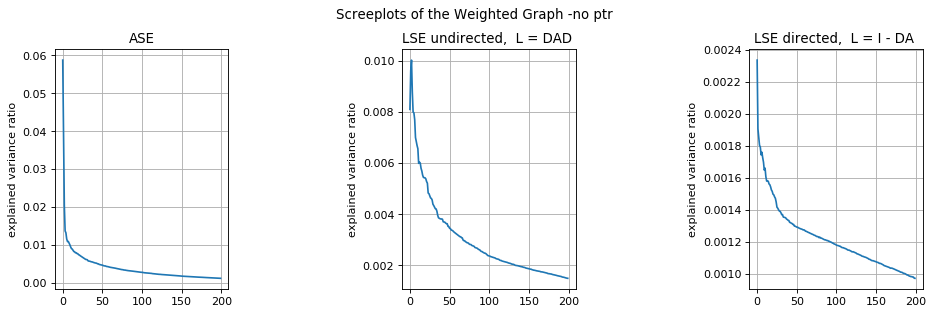

In [136]:
fig = plt.figure()
#fig.tight_layout()
plt.figure(figsize=(14, 4), dpi=80)

left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 1      # the top of the subplots of the figure
wspace = 1   # the amount of width reserved for blank space between subplots
hspace = 1   # the amount of height reserved for white space between subplots
plt.subplots_adjust(left=left, bottom=bottom, right=right, top=top, wspace=wspace, hspace=hspace)



plt.subplot(1, 3, 1)
plt.plot(ase_noptr_var_ratio)  #, '--o'
#plt.semilogy(svd.explained_variance_ratio_)
plt.ylabel("explained variance ratio") 
plt.title("ASE")
plt.grid()

plt.subplot(1, 3, 2)
plt.plot(lse_noptr_undir_var_ratio)  #, '--o'
#plt.semilogy(svd.explained_variance_ratio_)
plt.ylabel("explained variance ratio") 
plt.title("LSE undirected,  L = DAD ")
plt.grid()

plt.subplot(1, 3, 3)
plt.plot(lse_noptr_dir_var_ratio)  #, '--o'
#plt.semilogy(svd.explained_variance_ratio_)
plt.ylabel("explained variance ratio") 
plt.title("LSE directed,  L = I - DA ")
plt.grid()

plt.subplots_adjust(top=0.85)
plt.suptitle('Screeplots of the Weighted Graph -no ptr')

In [163]:

svd = TruncatedSVD(n_components=200, n_iter=7, random_state=svd_seed)
svd.fit(A)  
X_ase = svd.transform(A)           

ASE_cluster = gmm.gaussian_clustering(X_ase, max_clusters = 50, min_clusters=2)

if 1:  
    deg = (A.sum(axis=1).T + A.sum(axis=0)).astype(float) 
    deg_array = np.squeeze(np.asarray(deg))
    D = np.diag(deg_array**(-1))
    LSE_Matrix = np.identity(n) - D @ A
    svd_lse = svd.fit(LSE_Matrix)
    X_lse = svd_lse.transform(A) 

LSE_cluster = gmm.gaussian_clustering(X_lse, max_clusters = 50, min_clusters=2) 

ari_result = adjusted_rand_score(ASE_cluster, LSE_cluster)

c:\users\t-zemous\dev\first\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


In [165]:
ari_result

0.19034843234470994

spectral embedding into 200 dimensions


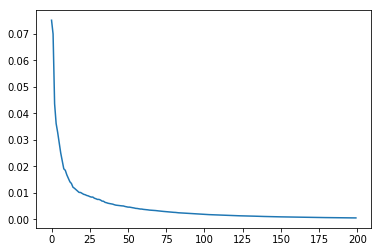

In [158]:
A_try = nx.to_numpy_matrix(G, nodelist=sorted_vertex)
if 1:
    row, col = A_noptr.shape
    n = min(row, col)

    print ("spectral embedding into %d dimensions" %max_dim)
    
    U, Sigma, VT = randomized_svd(A_try, 
                              n_components=min(max_dim, n - 1),
                              n_iter=50,
                              random_state=svd_seed)

X_transformed = np.dot(U, np.diag(Sigma))
exp_var = np.var(X_transformed, axis=0)

full_var = np.var(A_try, axis=0).sum()
    
ratio = exp_var / full_var
plt.plot(ratio)

In [71]:
# X_transformed = np.dot(U, np.diag(Sigma))
# np.var(X_transformed, axis=0) 
# np.var(A, axis=0).sum()


# import numpy as np
# from sklearn.decomposition import TruncatedSVD

# model = TruncatedSVD(n_components=10).fit(X)
# X_proj = model.transform(X)
# explained_variances = np.var(X_proj, axis=0) / np.var(X, axis=0).sum()

In [ ]:
# from sklearn.decomposition import TruncatedSVD
# from sklearn.random_projection import sparse_random_matrix
# X = sparse_random_matrix(100, 100, density=0.01, random_state=42)
# svd = TruncatedSVD(n_components=5, n_iter=7, random_state=42)
# svd.fit(X)  
# TruncatedSVD(algorithm='randomized', n_components=5, n_iter=7,
#         random_state=42, tol=0.0)
# print(svd.explained_variance_ratio_)  



In [70]:
#X.var(0)
#np.var(X, axis=0)

In [141]:
# import numpy as np
# from sklearn.decomposition import PCA

# np.random.seed(0)
# my_matrix = np.random.randn(20, 5)

# my_model = PCA(n_components=5)
# my_model.fit_transform(my_matrix)

# print (my_model.explained_variance_)
# print (my_model.explained_variance_ratio_)


In [142]:
#my_model.components_

In [ ]:
# pca
# explained_variance_ = (S ** 2) / n_samples
# explained_variance_ratio_ = (explained_variance_ /
#                              explained_variance_.sum())

# X_transformed = np.dot(U, np.diag(Sigma))
# self.explained_variance_ = exp_var = np.var(X_transformed, axis=0)
# if sp.issparse(X):
#     _, full_var = mean_variance_axis(X, axis=0)
#     full_var = full_var.sum()
# else:
#     full_var = np.var(X, axis=0).sum()
    
# self.explained_variance_ratio_ = exp_var / full_var


In [140]:
#X_transformed = np.dot(U, np.diag(Sigma))
#np.var(X_transformed, axis=0) / np.var(A, axis=0).sum()

In [149]:
type(A)

scipy.sparse.csr.csr_matrix

In [139]:
    
#     reduced_dim = rank_graph[(elb-1)]
#     print ("elbow is %d" %reduced_dim)
#     s_sqrt = np.sqrt(Sigma) #[np.newaxis] Zeinab commented this out

    
#     s_sqrt_dim_reduced = s_sqrt[:reduced_dim]
#     U_dim_reduced = U[:, :reduced_dim ]
#     VT_dim_reduced =VT[:reduced_dim, :]

#     Xhat1 = np.multiply( s_sqrt_dim_reduced, U_dim_reduced)
          
#     if nx.is_directed(G) == False:
#         Xhat2 = np.array([]).reshape(Xhat1.shape[0],0)
#     else:
#         Xhat2 = np.multiply( np.transpose(VT_dim_reduced), s_sqrt_dim_reduced)
#     Xhat = np.concatenate((Xhat1, Xhat2), axis=1)
    
#     embedded = collections.namedtuple('embedded', 'X vertex_labels')